Image Size: 4752 x 3168
Enter your alpha between 0 and 1: 0.4


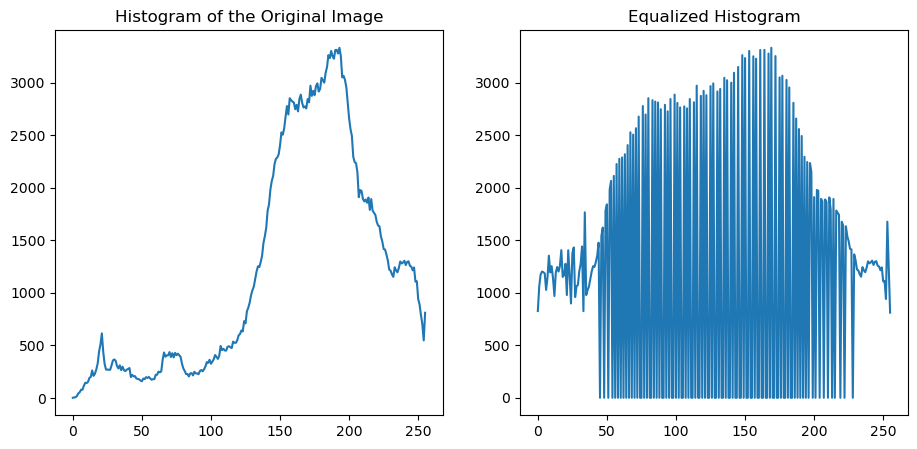

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from decimal import Decimal

original = cv.imread('test1.jpg')
cv.imshow('Original Image', original)
width = int(original.shape[1])
height = int(original.shape[0])
print(f"Image Size: {width} x {height}")

brightness_added = cv.add(original, np.ones(original.shape, dtype= "uint8") * 100)
cv.imshow('Brightness 100 Added to Original Image', brightness_added)
cv.imwrite('brigher_added .jpg', brightness_added)

contrast_multiplied = cv.multiply(original, np.ones(original.shape, dtype= "uint8"), scale = 1.5)
cv.imshow('Contrast Muliplied By 1.5 to Original Image', contrast_multiplied)
cv.imwrite('contrast_multiplied.jpg', brightness_added)

dimention = (width, height)
second_img = cv.imread('test2.jpg')
second_img_resized = cv.resize(second_img, dimention, interpolation = cv.INTER_AREA)

alpha = input("Enter your alpha between 0 and 1: ")
blended = cv.addWeighted(original, float(alpha), second_img_resized, 1-float(alpha), 0)
cv.imwrite('blended.jpg', blended)

nail_polish = cv.imread('nail_polish.jpg')
nail_polish_hsv = cv.cvtColor(nail_polish, cv.COLOR_BGR2HSV)
nail_polish_hsv_equalized = nail_polish_hsv
nail_polish_hsv_equalized[:,:,2] = cv.equalizeHist(nail_polish_hsv[:,:,2])
nail_polish_equalized = cv.cvtColor(nail_polish_hsv_equalized, cv.COLOR_HSV2BGR)
cv.imwrite('nail_equalized.jpg', nail_polish_equalized)

fig, ax = plt.subplots(1, 2, figsize=(11,5))
hist = cv.calcHist([nail_polish], [2], None, [256], [0, 256])
ax[0].plot(hist)
ax[0].set_title("Histogram of the Original Image")
equalized_hist = cv.calcHist([nail_polish_equalized], [2], None, [256], [0, 256])
ax[1].plot(equalized_hist)
ax[1].set_title("Equalized Histogram")
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()